In [73]:
# If there is an outlier in the data, the data is surely skewed
#  But if the data is skewed there might or might not be an outlier present in the dataset

## Detecting Outliers

### 1. Z Score Method

In [97]:
import pandas as pd
import numpy as np

In [98]:
array1 = np.random.randint(20,50, size = 15)
array2 = np.random.randint(50,100, size = 15)

In [99]:
df = pd.DataFrame({"Column1":array1,"Column2":array2})
df

,Column1,Column2
0,34,85
1,47,98
2,30,77
3,23,96
4,40,97
5,33,90
6,36,61
7,26,69
8,42,66
9,22,55


In [100]:
df.loc[12,"Column1"] = 200

In [101]:
df.loc[7,"Column2"] = 250

In [102]:
df

,Column1,Column2
0,34,85
1,47,98
2,30,77
3,23,96
4,40,97
5,33,90
6,36,61
7,26,250
8,42,66
9,22,55


In [103]:
import seaborn as sns

<Axes: xlabel='Column1', ylabel='Density'>

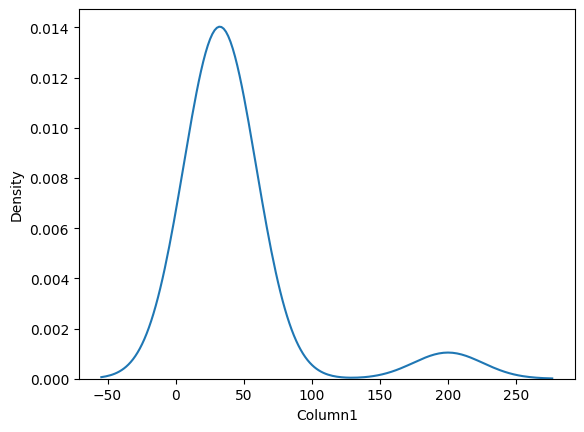

In [104]:
sns.kdeplot(df["Column1"])

<Axes: xlabel='Column2', ylabel='Density'>

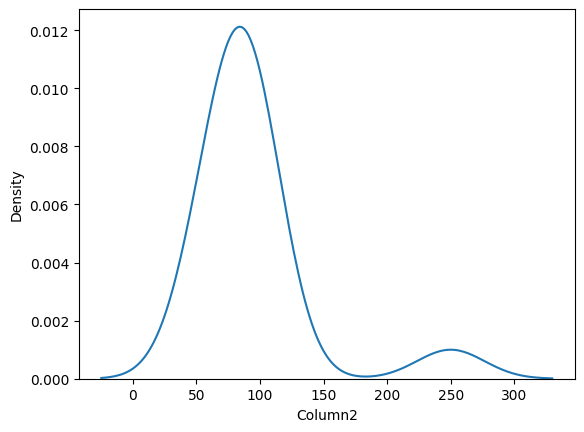

In [105]:
sns.kdeplot(df["Column2"])

In [114]:
# StandardScaler is a preprocessing technique that standardizes features 
# by removing the mean and scaling to unit variance.

In [ ]:
# Brings mean → 0 and std → 1.

# Important for models sensitive to scale.

# Doesn’t remove outliers but reduces their effect.

# Different from MinMaxScaler (which scales between 0–1).

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

In [108]:
scaler.fit(df)

StandardScaler()

In [109]:
df2 = pd.DataFrame(df2, columns = df.columns)

In [110]:
df2

,Column1,Column2
0,-0.583810,-0.867617
1,-0.033497,-0.377354
2,-0.488103,0.046055
3,-0.368470,-0.310500
4,-0.009571,-0.154507
5,-0.033497,0.179763
6,-0.440250,-0.689340
7,-0.177057,3.567037
8,-0.200984,-0.154507
9,0.014356,-0.421924


In [113]:
df2[(df2["Column1"]>3) | (df2["Column2"]>3)]

,Column1,Column2
7,-0.177057,3.567037
12,3.651205,0.068340


### 2. Second Z Score Method

In [115]:
# Find the z score transform of the array / pandas column
# • If, for a value in an array/column the Z – Score is less than -3 or greater than +3 that value shall be
# considered as an outlier
# • In other words if the value is greater than (mean + 3 x standard deviation) or less than (mean – 3 x standard
# deviation) the value should be considered as an outlier

In [116]:
# (mean + 3 * std) | (mean - 3*std)

In [125]:
upper_limit_c1 = df["Column1"].mean() + 3 *df["Column1"].std()

In [126]:
upper_limit_c1

np.float64(175.22599603124323)

In [132]:
lower_limit_c1 = df["Column1"].mean() - 3 * df["Column1"].std()
lower_limit_c1

np.float64(-87.89266269790991)

In [133]:
df[(df["Column1"]>upper_limit_c1) | (df["Column1"]< lower_limit_c1)]

,Column1,Column2
12,200,61


In [134]:
upper_limit_c2 = df["Column2"].mean() + 3*df["Column2"].std()
upper_limit_c2

np.float64(230.7420936634269)

In [135]:
lower_limit_c2 = df["Column2"].mean() - 3*df["Column2"].std()
lower_limit_c2

np.float64(-43.80876033009358)

In [136]:
df[
    (df["Column1"]>upper_limit_c1) |
    (df["Column1"]<lower_limit_c1) |
    (df["Column2"]>upper_limit_c2) |
    (df["Column2"]<lower_limit_c1)
]

,Column1,Column2
7,26,250
12,200,61


In [137]:
# We will get teh outlier with the help of z score 

### 3. IQR Method

In [138]:
# It is method used to detect the outlier from the data 

In [140]:
q1 = df["Column1"].quantile(0.25)
q3 = df["Column1"].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5* IQR
lower_limit = q1 - 1.5* IQR

In [141]:
df[(df["Column1"]>upper_limit) | (df["Column1"]<lower_limit)]

,Column1,Column2
12,200,61


In [142]:
q1 = df["Column2"].quantile(0.25)
q3 = df["Column2"].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

df[(df["Column2"]>upper_limit) | (df["Column2"]<lower_limit)]

,Column1,Column2
7,26,250


In [172]:
df = pd.read_csv("Boston_hpp.csv")
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [173]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [174]:
df1 = df.drop(columns=["Unnamed: 0"],axis = 1, inplace=True)

In [176]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [164]:
import matplotlib as plt

<Axes: >

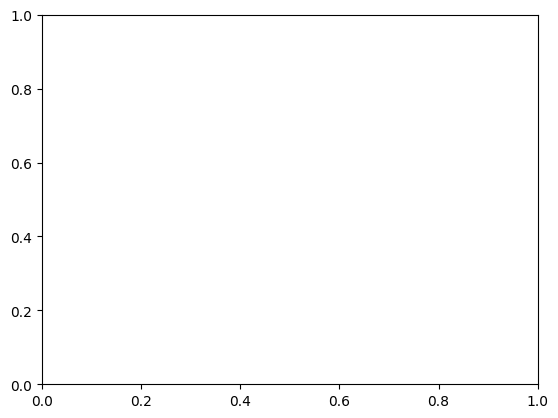

In [167]:
sns.kdeplot(df["CRIM"])

In [ ]:
from sklearn.datasets import 